# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [46]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [47]:

# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}weather?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make the request
        response = requests.get(city_url)
        
        # Print the response status code to see if it's a valid request
        print(f"Requesting data for {city}: Status Code: {response.status_code}")

        # Parse the JSON and retrieve data
        city_weather = response.json()

        # If city is not found, print the error message
        if city_weather.get("cod") != 200:
            print(f"City {city} not found. Error message: {city_weather.get('message')}")
        else:
            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather["coord"]["lat"] 
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            city_date = city_weather["dt"]

            # Append the City information into city_data list
            city_data.append({
                "City": city,
                "Lat": city_lat,
                "Lng": city_lng,
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date
            })
    
    except Exception as e:
        print(f"Error occurred for {city}: {str(e)}")
        print("City not found. Skipping...")

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

print(city_data)  


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Requesting data for port-aux-francais: Status Code: 200
Processing Record 2 of Set 1 | blackmans bay
Requesting data for blackmans bay: Status Code: 200
Processing Record 3 of Set 1 | vilyuchinsk
Requesting data for vilyuchinsk: Status Code: 200
Processing Record 4 of Set 1 | adamstown
Requesting data for adamstown: Status Code: 200
Processing Record 5 of Set 1 | ushuaia
Requesting data for ushuaia: Status Code: 200
Processing Record 6 of Set 1 | flying fish cove
Requesting data for flying fish cove: Status Code: 200
Processing Record 7 of Set 1 | georgetown
Requesting data for georgetown: Status Code: 200
Processing Record 8 of Set 1 | kodiak
Requesting data for kodiak: Status Code: 200
Processing Record 9 of Set 1 | atafu village
Requesting data for atafu village: Status Code: 200
Processing Record 10 of Set 1 | amos
Requesting data for amos: Status Code: 200
Processing Record

In [48]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [49]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,4.75,74,38,12.08,TF,1735511624
1,blackmans bay,-43.0167,147.3167,19.85,61,87,2.14,AU,1735511626
2,vilyuchinsk,52.9306,158.4028,-13.85,82,78,5.20,RU,1735511627
3,adamstown,-25.0660,-130.1015,24.30,84,100,7.92,PN,1735511628
4,ushuaia,-54.8000,-68.3000,18.81,39,0,2.57,AR,1735511630
5,flying fish cove,-10.4217,105.6791,23.82,94,99,2.57,CX,1735511631
6,georgetown,5.4112,100.3354,26.96,68,20,3.09,MY,1735511632
7,kodiak,57.7900,-152.4072,-2.27,100,100,0.00,US,1735511633
8,atafu village,-8.5421,-172.5159,28.36,72,11,2.80,TK,1735511635
9,amos,48.5669,-78.1162,0.72,100,100,1.83,CA,1735511636


In [50]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [51]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.75,74,38,12.08,TF,1735511624
1,blackmans bay,-43.0167,147.3167,19.85,61,87,2.14,AU,1735511626
2,vilyuchinsk,52.9306,158.4028,-13.85,82,78,5.20,RU,1735511627
3,adamstown,-25.0660,-130.1015,24.30,84,100,7.92,PN,1735511628
4,ushuaia,-54.8000,-68.3000,18.81,39,0,2.57,AR,1735511630
5,flying fish cove,-10.4217,105.6791,23.82,94,99,2.57,CX,1735511631
6,georgetown,5.4112,100.3354,26.96,68,20,3.09,MY,1735511632
7,kodiak,57.7900,-152.4072,-2.27,100,100,0.00,US,1735511633
8,atafu village,-8.5421,-172.5159,28.36,72,11,2.80,TK,1735511635


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

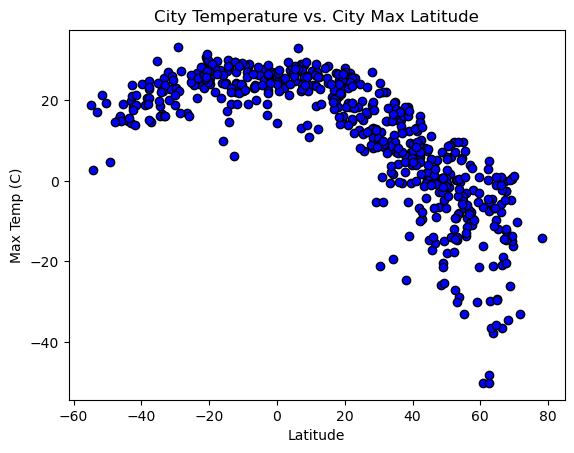

In [52]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], 
            city_data_df['Max Temp'], 
            color='blue', 
            marker='o', 
            edgecolors='black')

# Incorporate the other graph properties
plt.title('City Temperature vs. City Max Latitude'),
plt.xlabel('Latitude'),
plt.ylabel('Max Temp (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

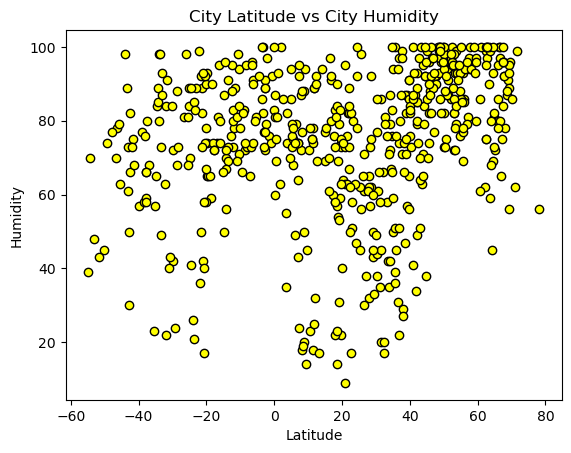

In [53]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],
            city_data_df['Humidity'],
            color='yellow', 
            marker='o',
            edgecolors='black')


# Incorporate the other graph properties
plt.title("City Latitude vs City Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

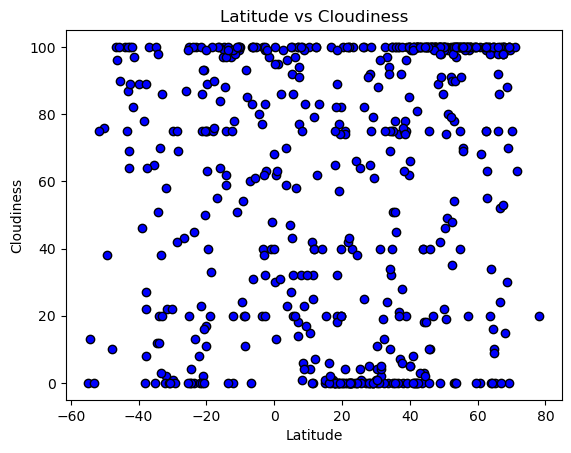

In [54]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],
            city_data_df['Cloudiness'],
            color='blue', 
            marker='o',
            edgecolors='black')

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

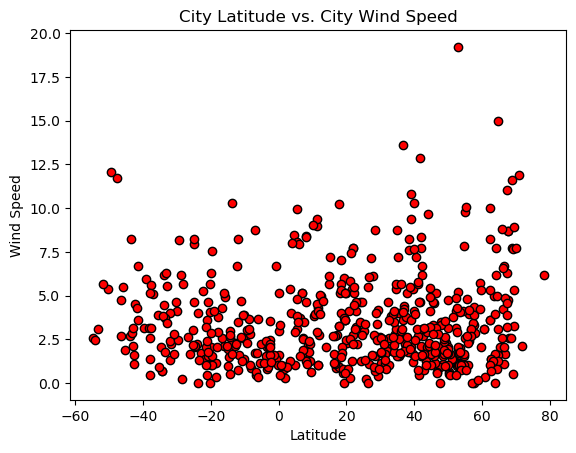

In [55]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],
            city_data_df['Wind Speed'],
            color='red', 
            marker='o',
            edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. City Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
           
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


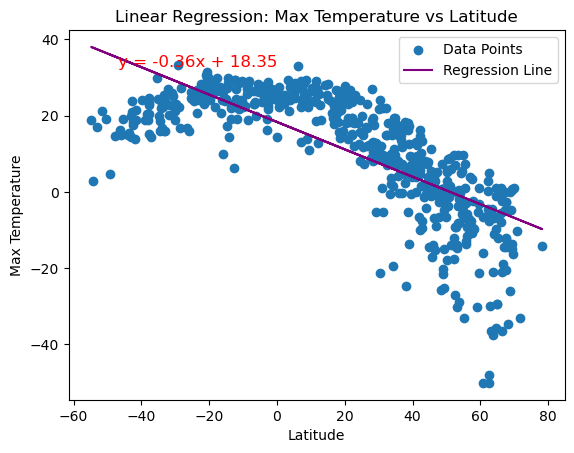

The r^2-value is: -0.733042687758583


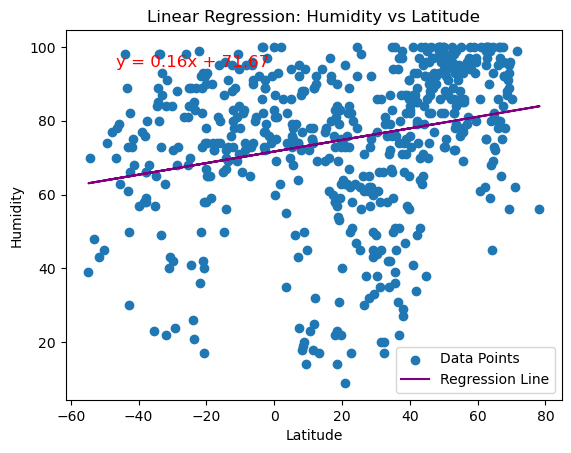

The r^2-value is: 0.24859157004576754


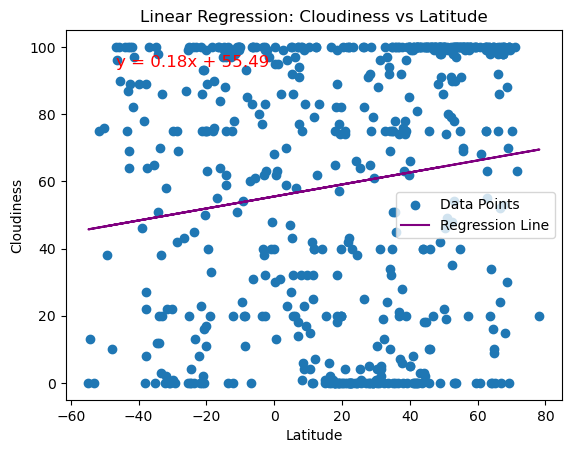

The r^2-value is: 0.14577837690799877


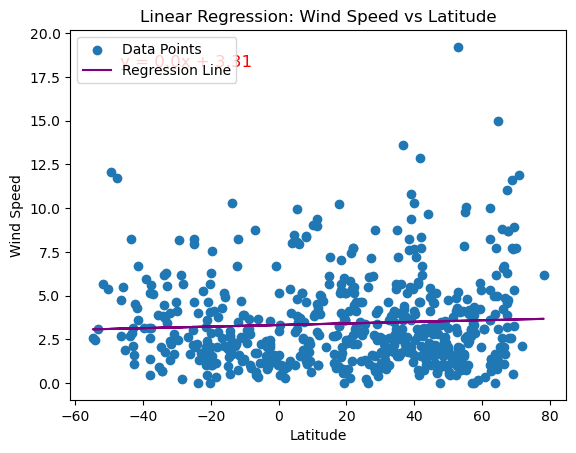

The r^2-value is: 0.05667494821536569


(0.0045130508095128806,
 3.3129239154985846,
 0.05667494821536569,
 0.17435711490761882,
 0.0033183679066410574)

In [56]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values, x_label, y_label):
        (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
        regress_values = slope * x_values + intercept
        plt.scatter(x_values, y_values, label='Data Points')
        plt.plot(x_values, regress_values, color='purple', label='Regression Line')
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.title(f'Linear Regression: {y_label} vs {x_label}')
        plt.legend()
        plt.annotate(f'y = {round(slope, 2)}x + {round(intercept, 2)}', 
                xy=(0.1, 0.9), 
                xycoords='axes fraction', 
                fontsize=12, 
                color='red')
        plt.show()
        print(f"The r^2-value is: {r_value}")
        return slope, intercept, r_value, p_value, std_err

# Create regression values'
create_linear_regression_plot(city_data_df['Lat'], city_data_df['Max Temp'], 'Latitude', 'Max Temperature')
create_linear_regression_plot(city_data_df['Lat'], city_data_df['Humidity'], 'Latitude', 'Humidity')
create_linear_regression_plot(city_data_df['Lat'], city_data_df['Cloudiness'], 'Latitude', 'Cloudiness')
create_linear_regression_plot(city_data_df['Lat'], city_data_df['Wind Speed'], 'Latitude', 'Wind Speed')


In [57]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
def northern_hemisphere_df(weather_data):
    return weather_data[weather_data['Lat']>=0]
northern_hemisphere_df = northern_hemisphere_df(city_data_df)


# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,vilyuchinsk,52.9306,158.4028,-13.85,82,78,5.20,RU,1735511627
6,georgetown,5.4112,100.3354,26.96,68,20,3.09,MY,1735511632
7,kodiak,57.7900,-152.4072,-2.27,100,100,0.00,US,1735511633
9,amos,48.5669,-78.1162,0.72,100,100,1.83,CA,1735511636
10,i-n-salah,27.1935,2.4607,12.27,38,0,7.12,DZ,1735511637


In [58]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
def southern_hemisphere_df(weather_data):
    return weather_data[weather_data['Lat']<=0]
southern_hemisphere_df = southern_hemisphere_df(city_data_df)

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.75,74,38,12.08,TF,1735511624
1,blackmans bay,-43.0167,147.3167,19.85,61,87,2.14,AU,1735511626
3,adamstown,-25.0660,-130.1015,24.30,84,100,7.92,PN,1735511628
4,ushuaia,-54.8000,-68.3000,18.81,39,0,2.57,AR,1735511630
5,flying fish cove,-10.4217,105.6791,23.82,94,99,2.57,CX,1735511631


###  Temperature vs. Latitude Linear Regression Plot

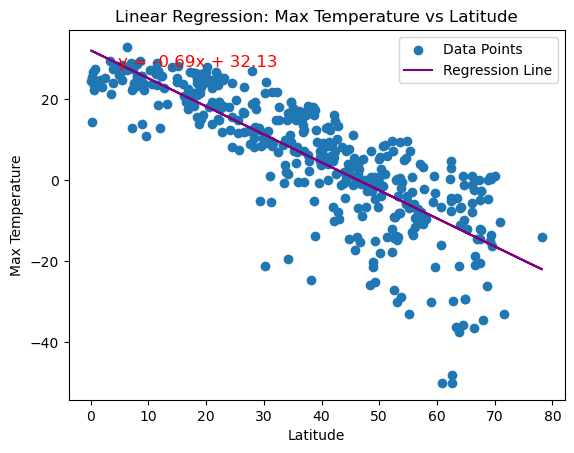

The r^2-value is: -0.8207518333919923


(-0.6927685208531367,
 32.13047337361108,
 -0.8207518333919923,
 1.7134085473699304e-101,
 0.023843355213528)

In [59]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(northern_hemisphere_df['Lat'], northern_hemisphere_df['Max Temp'], 'Latitude', 'Max Temperature')

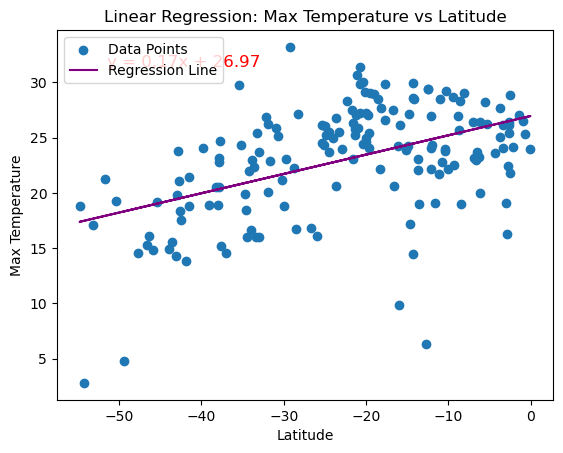

The r^2-value is: 0.47821956403583415


(0.17494872902946557,
 26.966897569892847,
 0.47821956403583415,
 8.242581335010343e-11,
 0.025165352547694236)

In [60]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemisphere_df['Lat'], southern_hemisphere_df['Max Temp'], 'Latitude', 'Max Temperature')

### Humidity vs. Latitude Linear Regression Plot

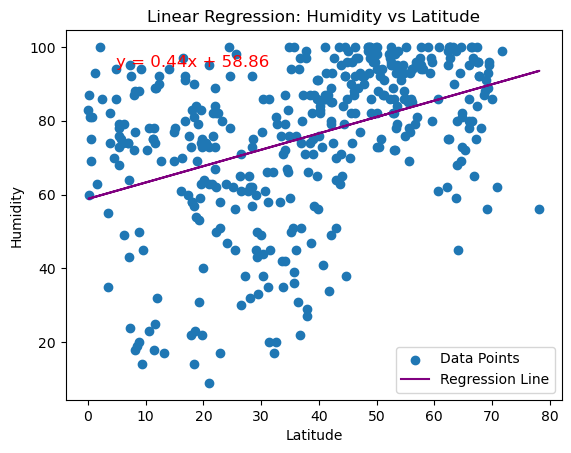

The r^2-value is: 0.4007812567646755


(0.44324929363357574,
 58.85502727822015,
 0.4007812567646755,
 2.7320662961969066e-17,
 0.050102206324338344)

In [61]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemisphere_df['Lat'], northern_hemisphere_df['Humidity'], 'Latitude', 'Humidity')

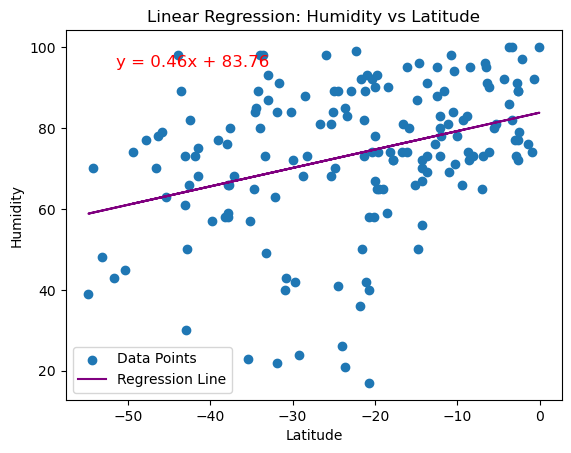

The r^2-value is: 0.3478759968961718


(0.4551600136098487,
 83.76108581505645,
 0.3478759968961718,
 4.68544432526141e-06,
 0.09608064243431025)

In [62]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemisphere_df['Lat'], southern_hemisphere_df['Humidity'], 'Latitude', 'Humidity')

### Cloudiness vs. Latitude Linear Regression Plot

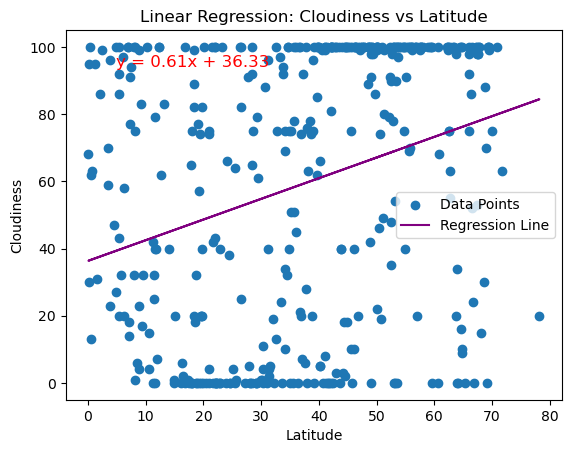

The r^2-value is: 0.2902143591737278


(0.6148825673374642,
 36.3296292413336,
 0.2902143591737278,
 2.0330325438752184e-09,
 0.1002550296927376)

In [63]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemisphere_df['Lat'], northern_hemisphere_df['Cloudiness'], 'Latitude', 'Cloudiness')

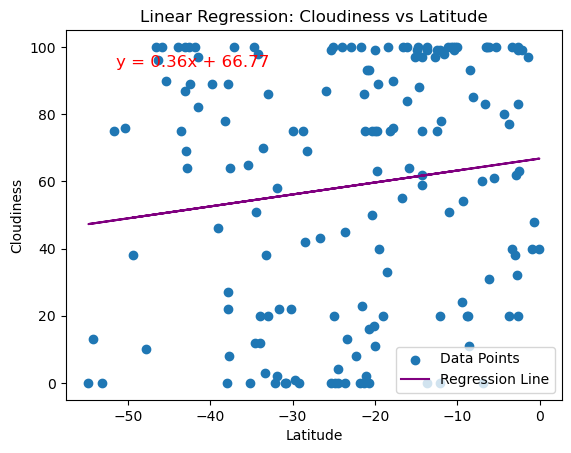

The r^2-value is: 0.1333904280667913


(0.35591730493145163,
 66.77423426886128,
 0.1333904280667913,
 0.08762770387222953,
 0.2071248213378385)

In [64]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemisphere_df['Lat'], southern_hemisphere_df['Cloudiness'], 'Latitude', 'Cloudiness')

### Wind Speed vs. Latitude Linear Regression Plot

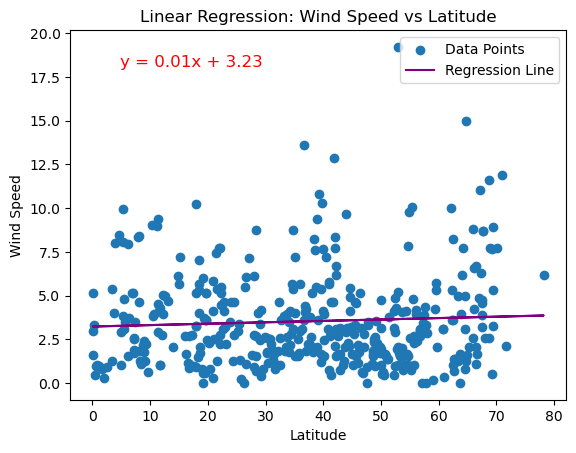

The r^2-value is: 0.057238089888224424


(0.008034954072585856,
 3.226733738620254,
 0.057238089888224424,
 0.24694125820881024,
 0.006929853074438457)

In [65]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemisphere_df['Lat'], northern_hemisphere_df['Wind Speed'], 'Latitude', 'Wind Speed')

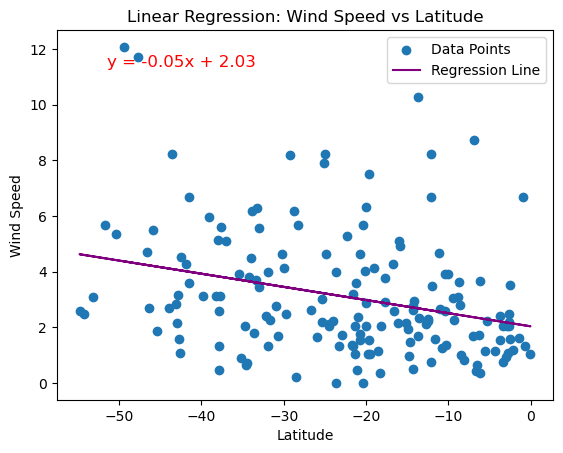

The r^2-value is: -0.294563431816033


(-0.04730046874174889,
 2.034001220151567,
 -0.294563431816033,
 0.0001227664307895526,
 0.012019418675794695)

In [66]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemisphere_df['Lat'], southern_hemisphere_df['Wind Speed'], 'Latitude', 'Wind Speed')

**Discussion about the linear relationship: The regression lines above show little to no correlation with both the latitude vs Cloudiness and Latitude vs. Wind Speed graphs indicating a poor relationship between these factors. 